# Climate change

## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../selected_data.csv')
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),63.300,62.751,62.201,61.646,61.089,60.527,59.965,...,44.613,43.577,42.566,41.579,40.617,39.681,38.771,37.888,37.031,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672,12.458,12.248,12.040,11.836,11.634,11.436,...,8.751,8.623,8.497,8.373,8.251,8.130,8.009,7.889,7.771,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),32.850,33.122,33.394,33.668,33.943,34.219,34.496,...,36.836,36.888,36.915,36.918,36.897,36.851,36.781,36.687,36.569,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),14.597,14.715,14.843,14.972,15.102,15.233,15.364,...,14.498,14.398,14.299,14.200,14.096,13.988,13.876,13.759,13.638,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),37.311,37.583,37.856,38.130,38.404,38.680,38.955,...,42.664,42.474,42.285,42.095,41.906,41.703,41.485,41.252,41.005,Austria


In [3]:
category_name = 'climate_change'

In [4]:
df = df[df['Category Name'] == category_name]
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
485,ALB,climate_change,Urban population (% of total population),36.700,37.249,37.799,38.354,38.911,39.473,40.035,...,55.387,56.423,57.434,58.421,59.383,60.319,61.229,62.112,62.969,Albania
486,ARG,climate_change,Urban population (% of total population),87.328,87.542,87.752,87.960,88.164,88.366,88.564,...,91.249,91.377,91.503,91.627,91.749,91.870,91.991,92.111,92.229,Argentina
487,ARM,climate_change,Urban population (% of total population),67.150,66.878,66.606,66.332,66.057,65.781,65.504,...,63.164,63.112,63.085,63.082,63.103,63.149,63.219,63.313,63.431,Armenia
488,AUS,climate_change,Urban population (% of total population),85.403,85.285,85.157,85.028,84.898,84.767,84.636,...,85.502,85.602,85.701,85.800,85.904,86.012,86.124,86.241,86.362,Australia
489,AUT,climate_change,Urban population (% of total population),62.689,62.417,62.144,61.870,61.596,61.320,61.045,...,57.336,57.526,57.715,57.905,58.094,58.297,58.515,58.748,58.995,Austria


In [5]:
df['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Population, total',
       'Population growth (annual %)',
       'Mortality rate, under-5 (per 1,000 live births)'], dtype=object)

## Preprocess

In [6]:
import sys
sys.path.append('../')

In [7]:
from utlis.data_preprocess import fill_missing_with_mean, min_max_scaling_by_specific_category

df = fill_missing_with_mean(df)
df = min_max_scaling_by_specific_category(df)
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
485,ALB,climate_change,Urban population (% of total population),0.323320,0.327881,0.332443,0.337040,0.341635,0.346276,0.350902,...,0.496001,0.506064,0.515866,0.525419,0.534710,0.543729,0.552474,0.560933,0.569116,Albania
486,ARG,climate_change,Urban population (% of total population),0.864536,0.866564,0.868551,0.870518,0.872442,0.874347,0.876210,...,0.901139,0.902260,0.903358,0.904431,0.905480,0.906517,0.907554,0.908578,0.909579,Argentina
487,ARM,climate_change,Urban population (% of total population),0.648832,0.645234,0.641607,0.637924,0.634192,0.630416,0.626594,...,0.583859,0.581882,0.580139,0.578619,0.577325,0.576269,0.575444,0.574851,0.574492,Armenia
488,AUS,climate_change,Urban population (% of total population),0.843957,0.842389,0.840701,0.838987,0.837244,0.835475,0.833691,...,0.836214,0.836802,0.837367,0.837922,0.838523,0.839159,0.839832,0.840553,0.841312,Australia
489,AUT,climate_change,Urban population (% of total population),0.601144,0.597453,0.593719,0.589938,0.586115,0.582235,0.578327,...,0.518019,0.518566,0.519062,0.519529,0.519944,0.520479,0.521146,0.521949,0.522876,Austria


## Arithmetic mean

In [8]:
plot_mean_title = f'Mean of {category_name}'

In [9]:
df_mean = df[['Country Name','Indicator Name']].copy()
df_mean['Mean'] = df.loc[:,"1991":"2021"].mean(axis=1)
df_mean.head()

,Country Name,Indicator Name,Mean
485,Albania,Urban population (% of total population),0.431669
486,Argentina,Urban population (% of total population),0.889913
487,Armenia,Urban population (% of total population),0.603474
488,Australia,Urban population (% of total population),0.834957
489,Austria,Urban population (% of total population),0.548031


### Dendogram

2024-05-26 18:09:52.199292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


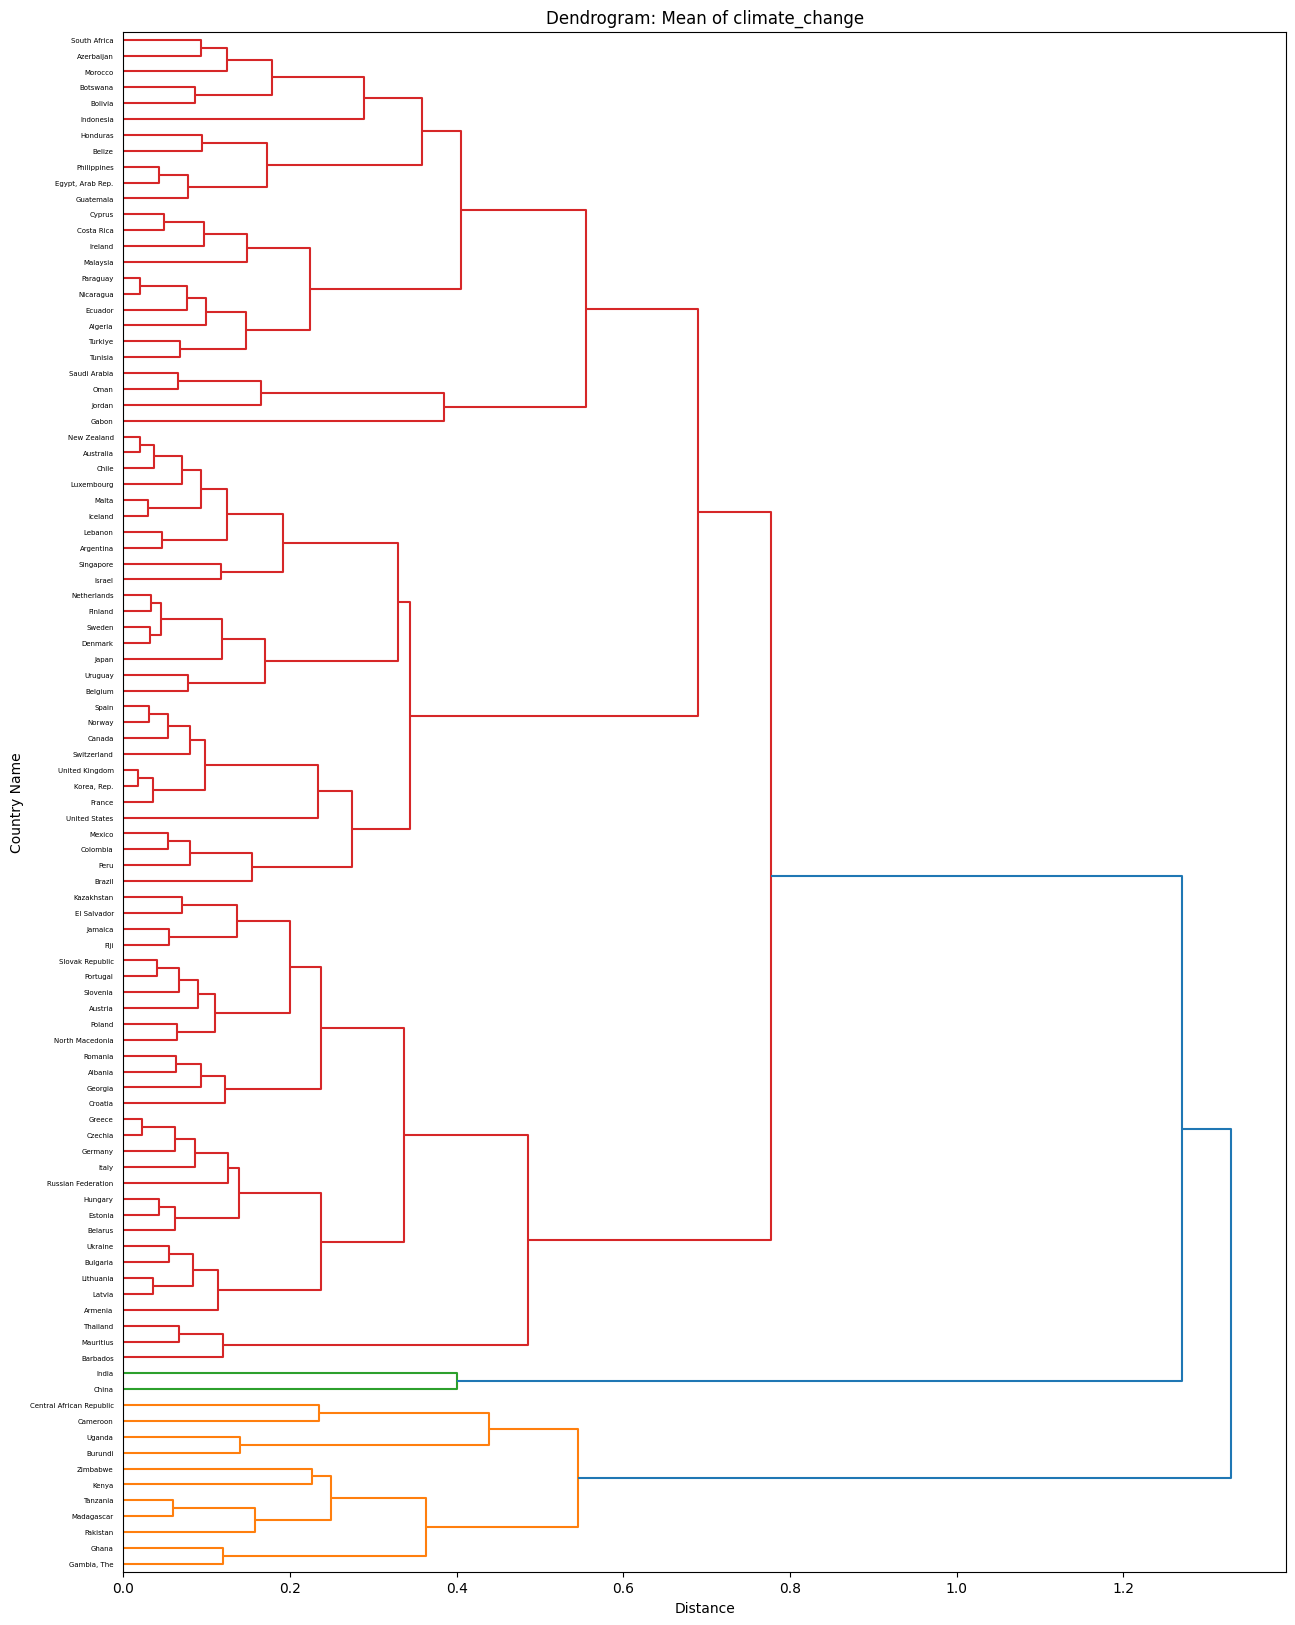

In [10]:
from utlis.visualisation import plot_dendogram

plot_dendogram(df_mean, plot_mean_title, 'Mean')

### KMeans

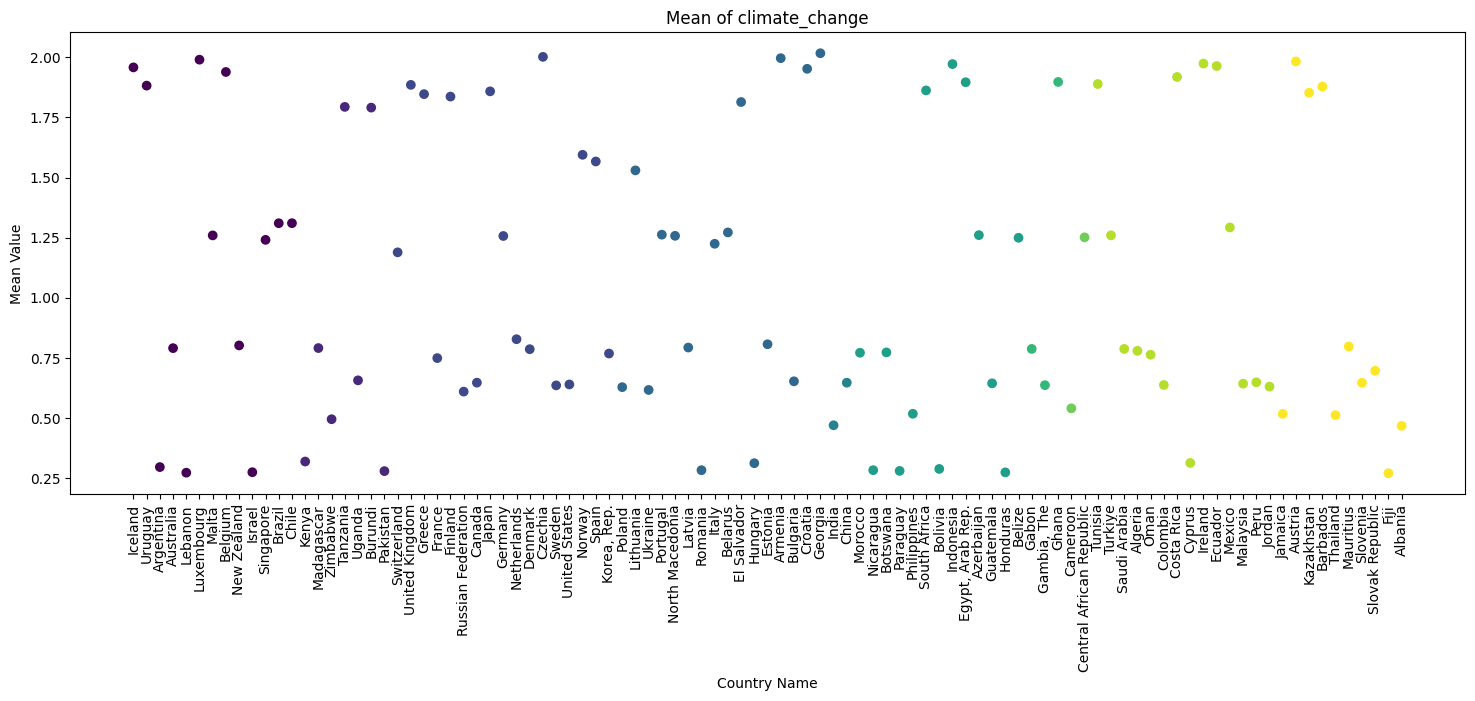

In [11]:
from utlis.kmeans import calculate_kmeans

k_means_outcome, cluster_centers = calculate_kmeans(df_mean, plot_mean_title, 'Mean')

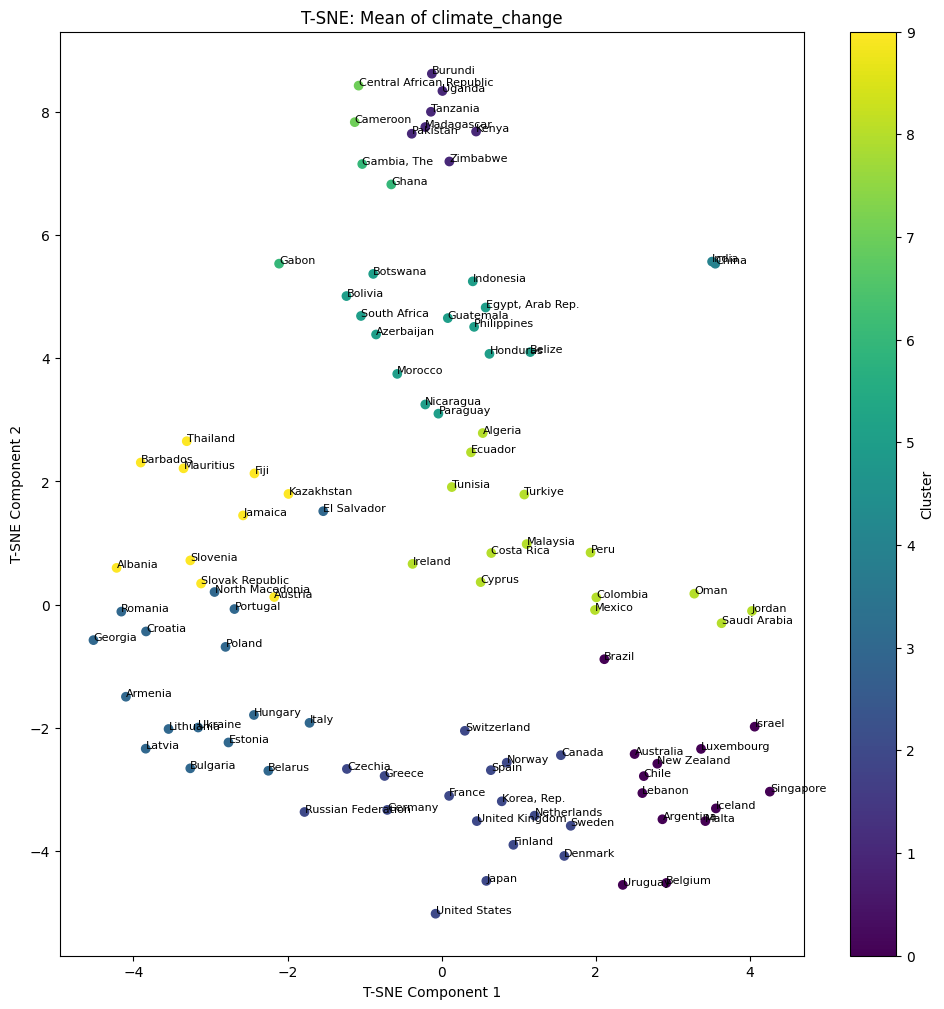

In [12]:
from utlis.visualisation import plot_tsne

plot_tsne(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_mean_title)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


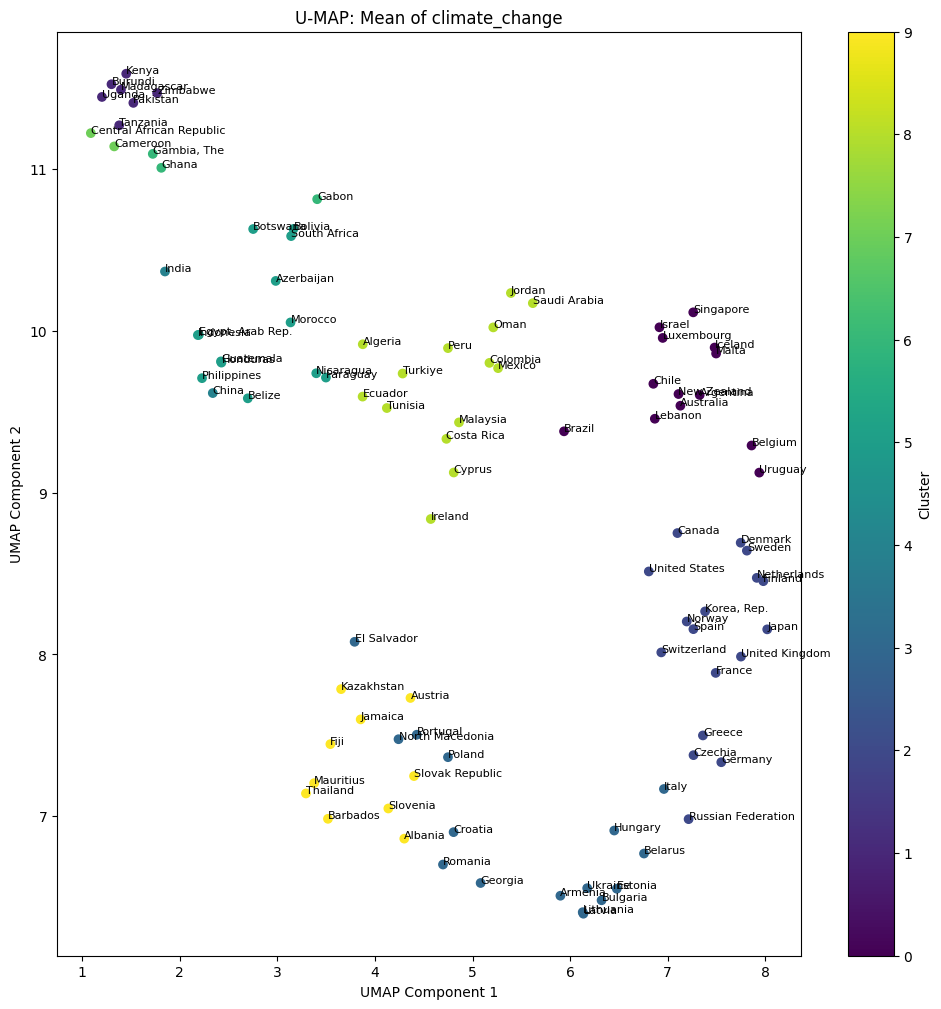

In [13]:
from utlis.visualisation import plot_umap

plot_umap(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_mean_title)

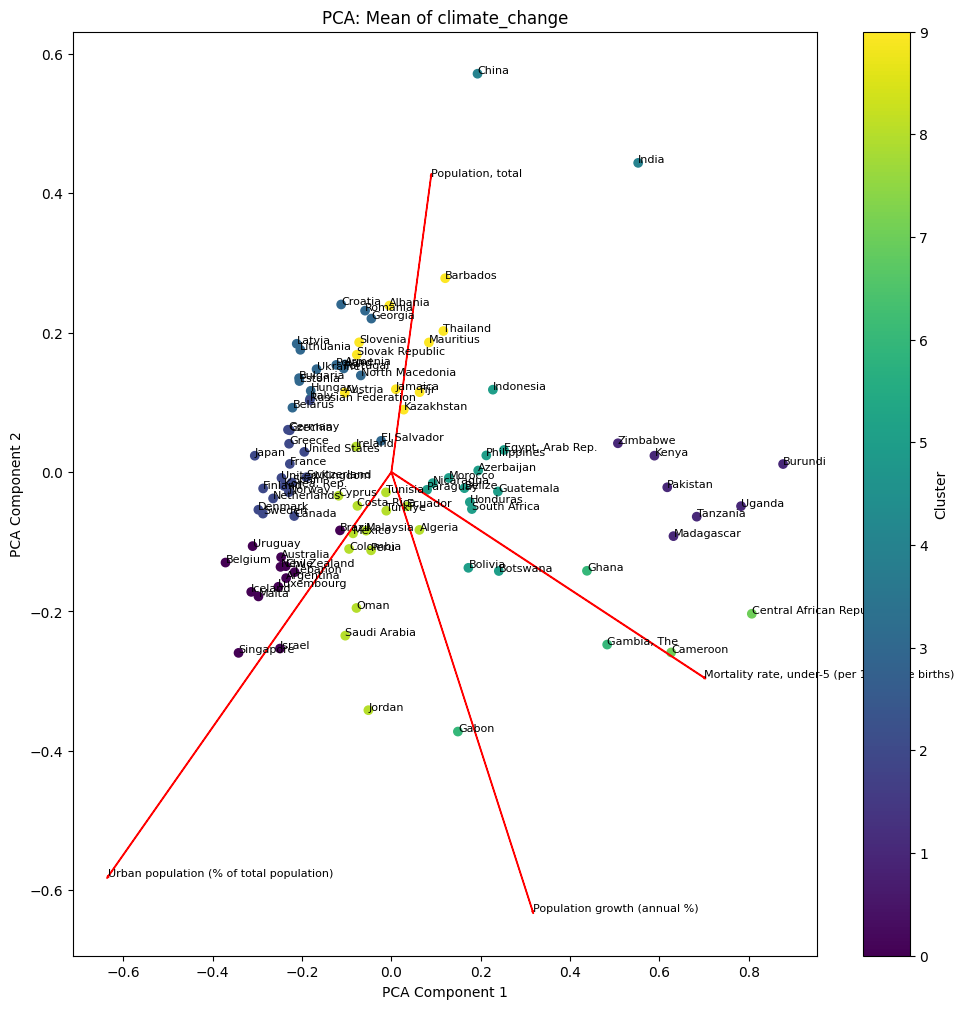

In [14]:
from utlis.visualisation import plot_pca

plot_pca(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], k_means_outcome.columns.values[:-1], plot_mean_title)

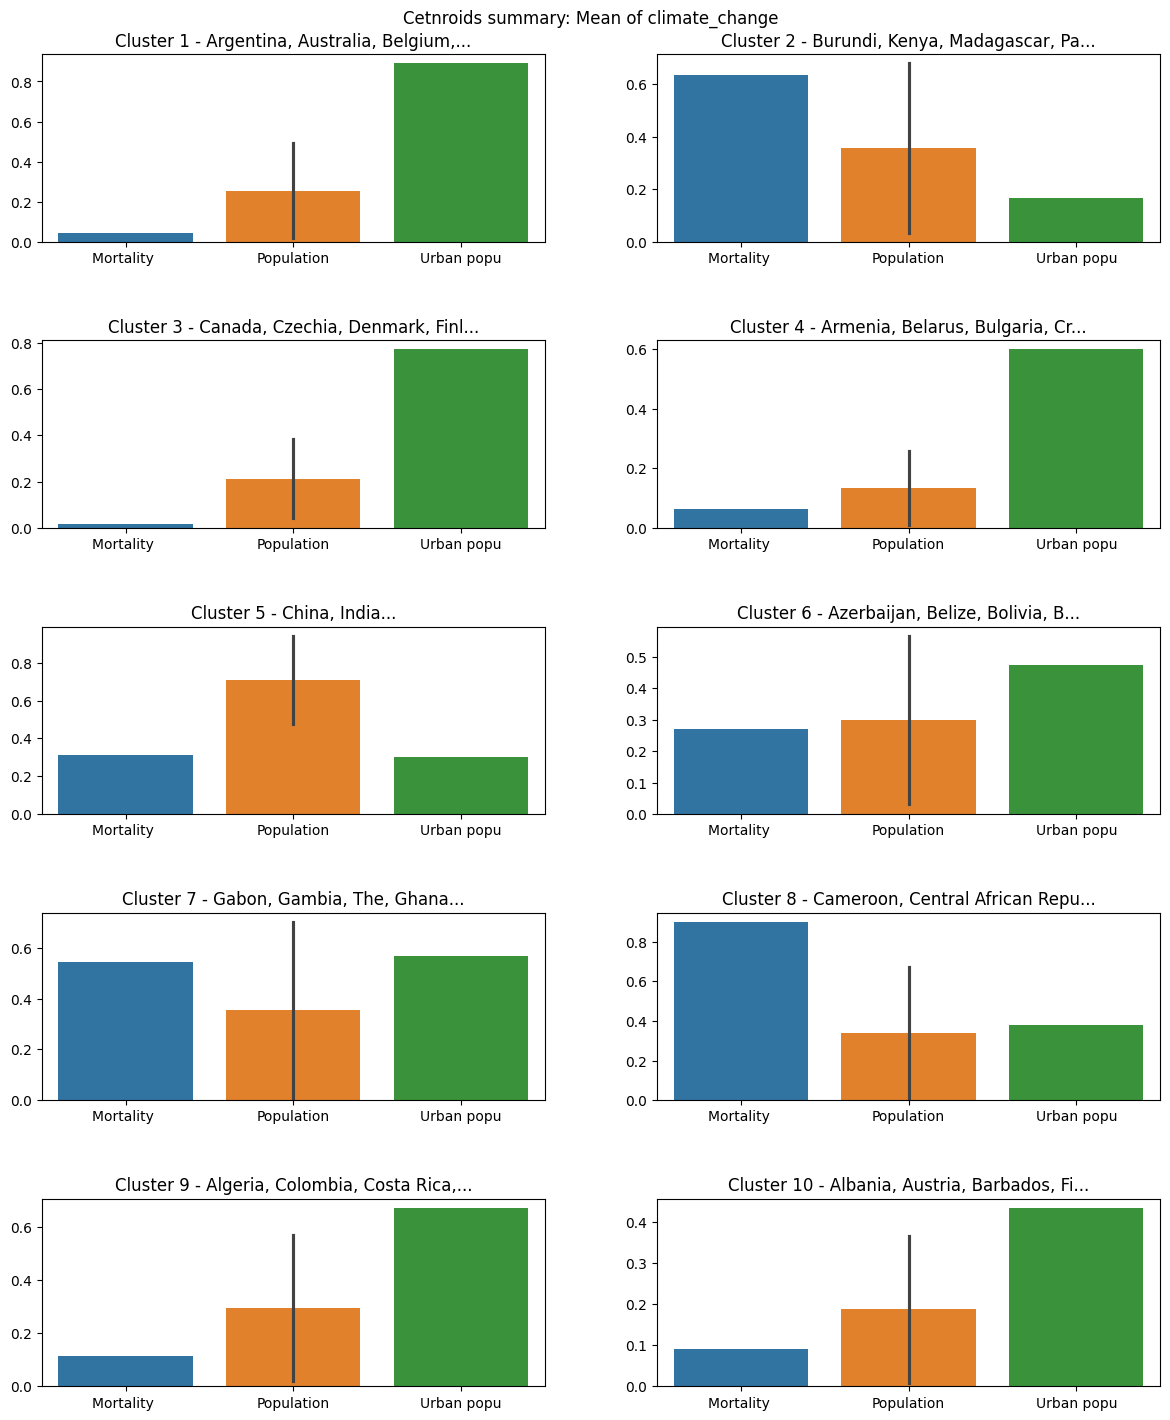

In [15]:
from utlis.visualisation import plot_centroid

plot_centroid(cluster_centers, k_means_outcome, plot_mean_title)

/tf/World_Bank_Data_Analysis/reports/../utlis/map_handler.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


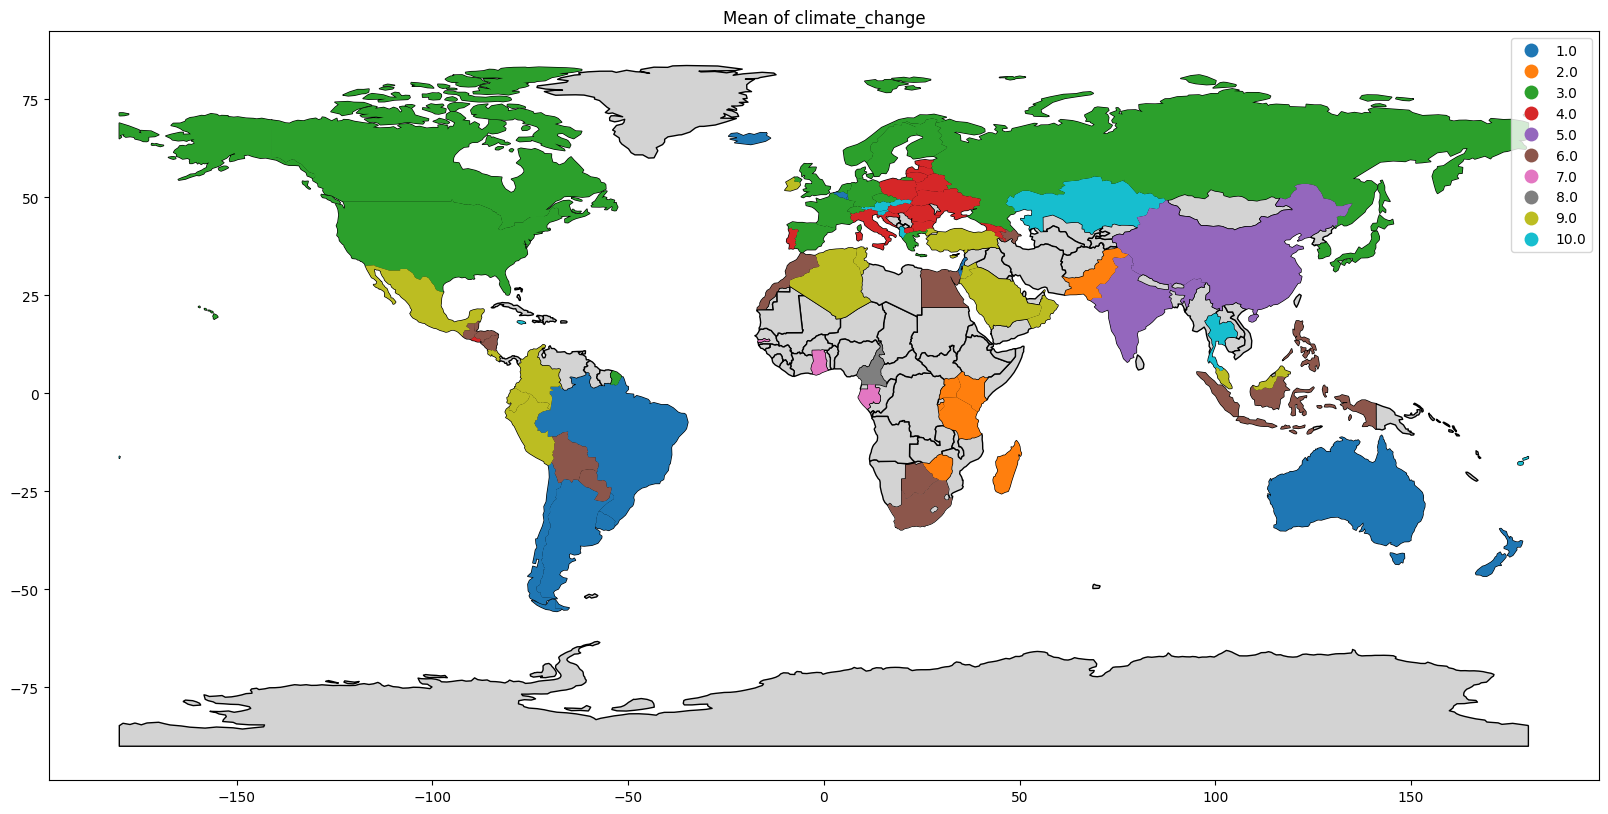

In [16]:
from utlis.map_handler import plot_map

plot_map(k_means_outcome['Cluster'], plot_mean_title)

## Last available year - 2021

In [17]:
plot_last_year_title = f'{category_name} for 2021'

In [18]:
df_2021 = df[['Country Name','Indicator Name', '2021']].copy()
df_2021.head()

,Country Name,Indicator Name,2021
485,Albania,Urban population (% of total population),0.569116
486,Argentina,Urban population (% of total population),0.909579
487,Armenia,Urban population (% of total population),0.574492
488,Australia,Urban population (% of total population),0.841312
489,Austria,Urban population (% of total population),0.522876


### Dendogram

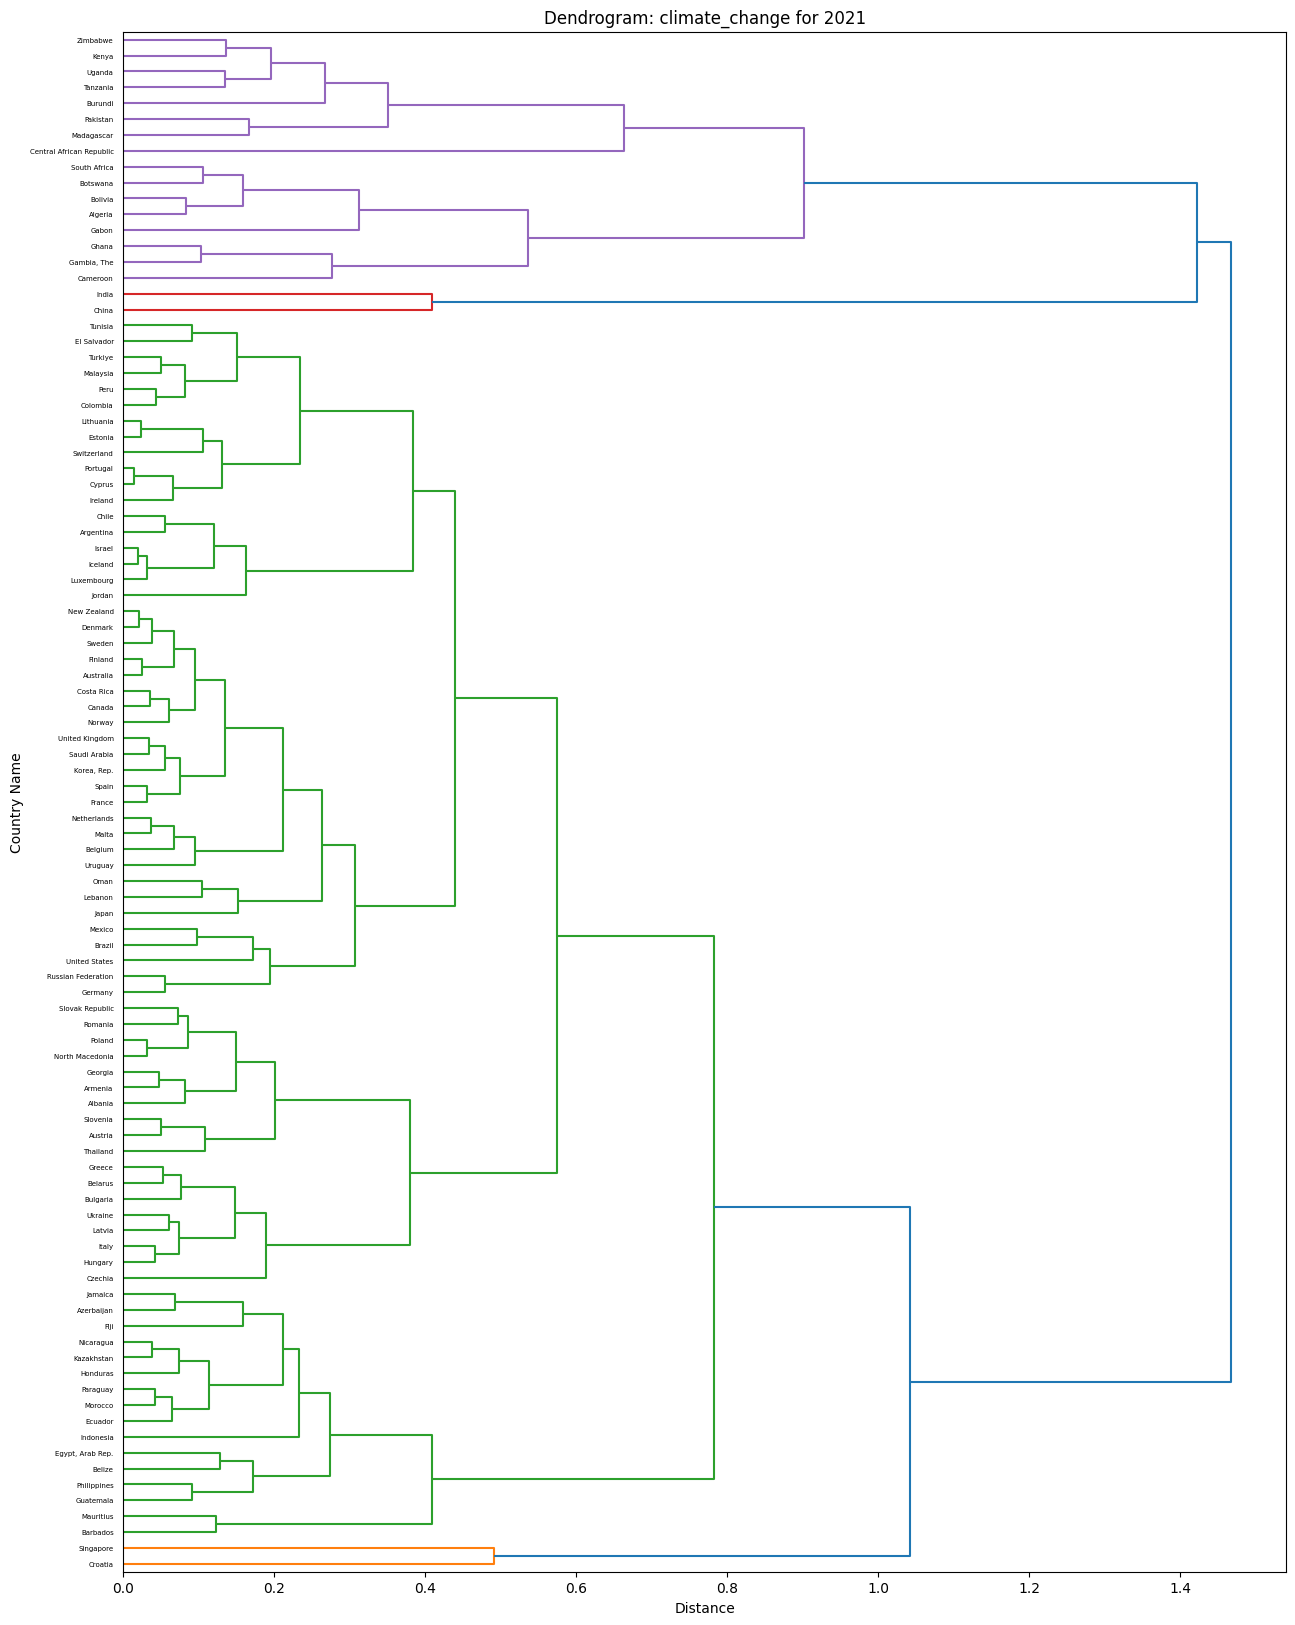

In [19]:
from utlis.visualisation import plot_dendogram

plot_dendogram(df_2021, plot_last_year_title, '2021')

### KMeans

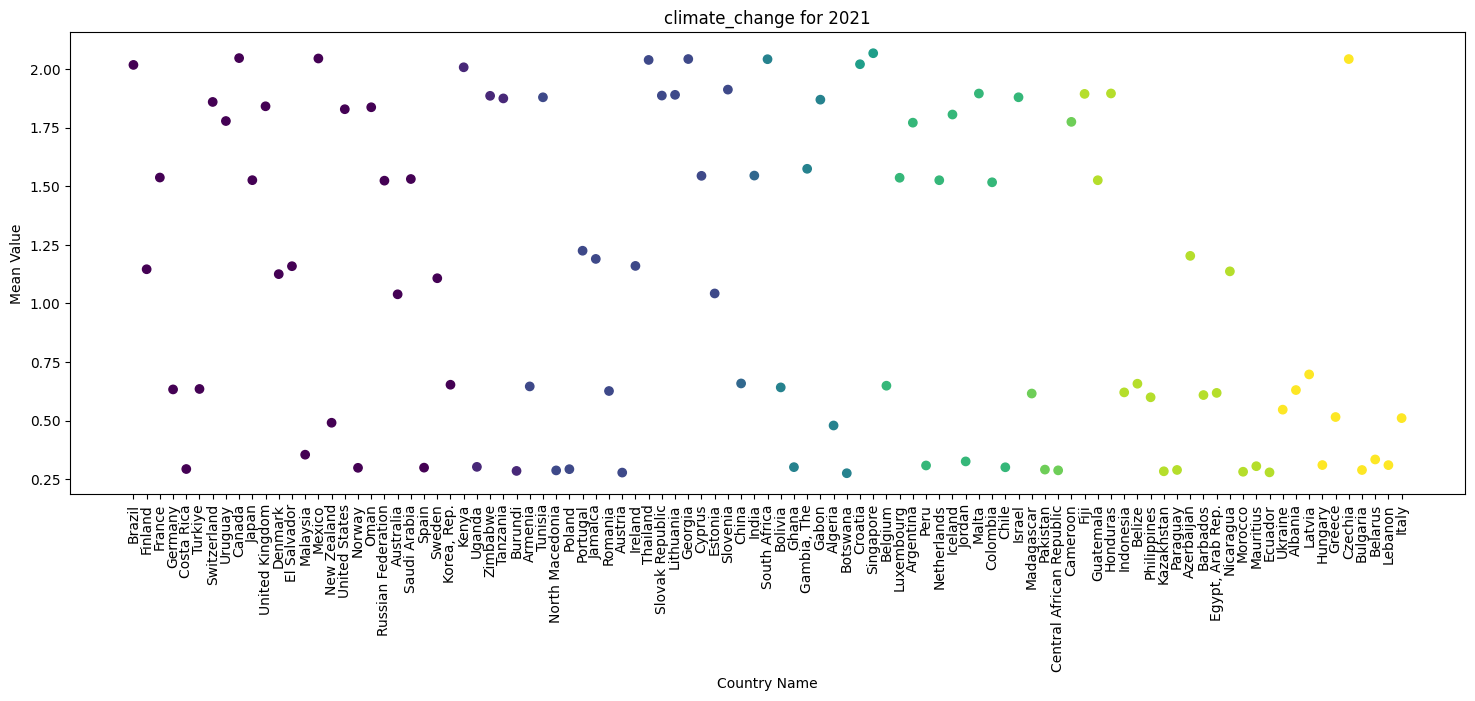

In [20]:
from utlis.kmeans import calculate_kmeans

k_means_outcome, cluster_centers = calculate_kmeans(df_2021, plot_last_year_title, '2021')

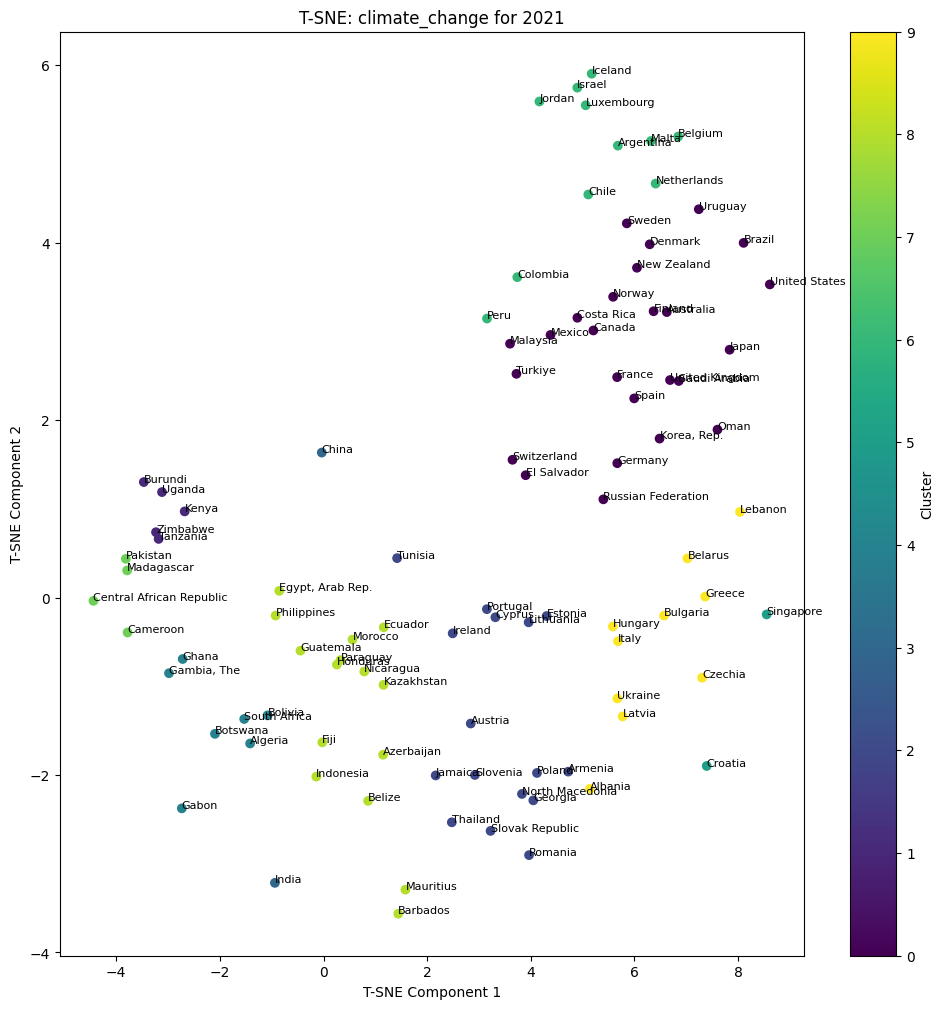

In [21]:
from utlis.visualisation import plot_tsne

plot_tsne(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_last_year_title)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


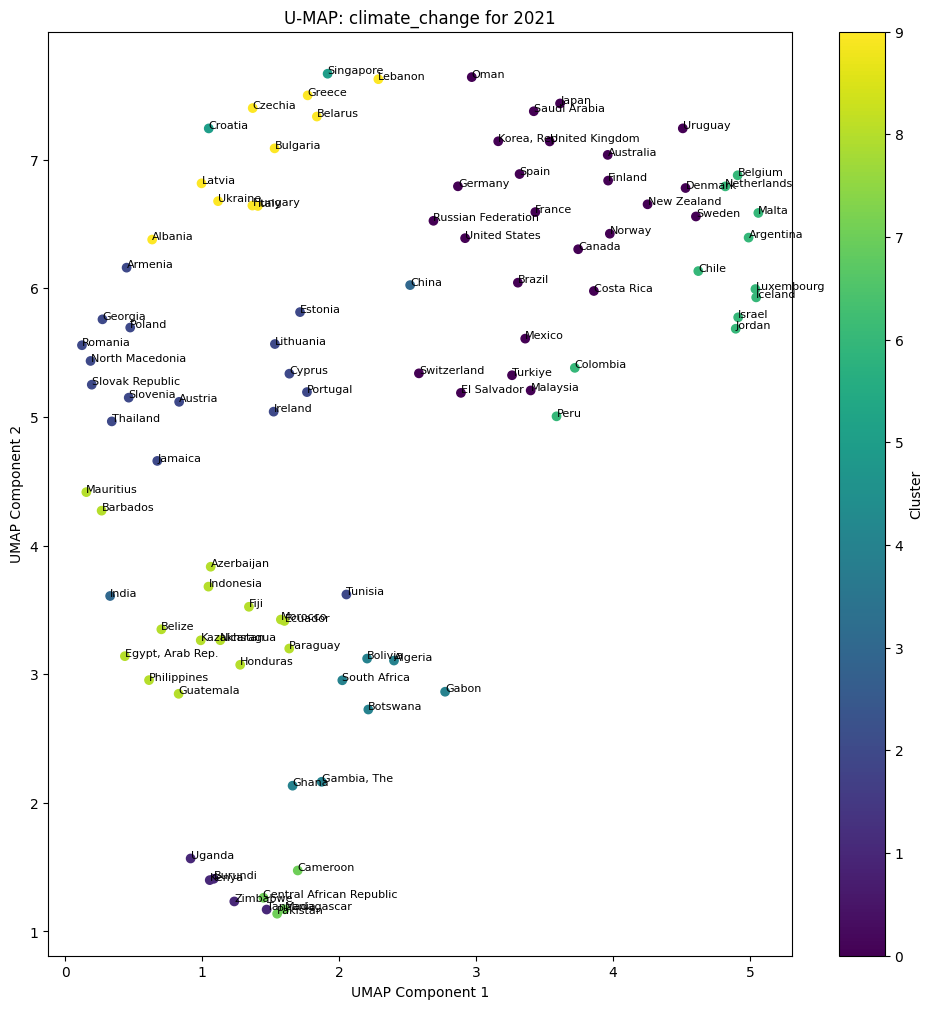

In [22]:
from utlis.visualisation import plot_umap

plot_umap(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_last_year_title)

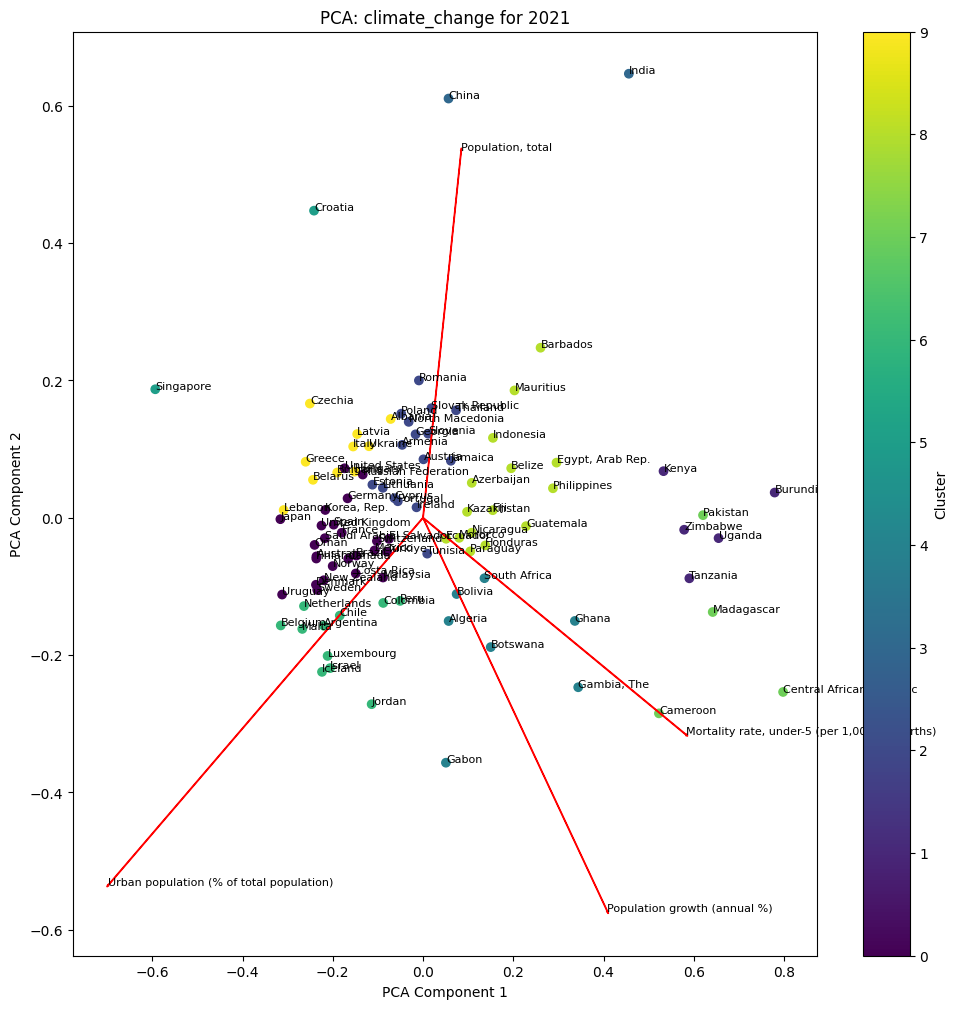

In [23]:
from utlis.visualisation import plot_pca

plot_pca(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], k_means_outcome.columns.values[:-1], plot_last_year_title)

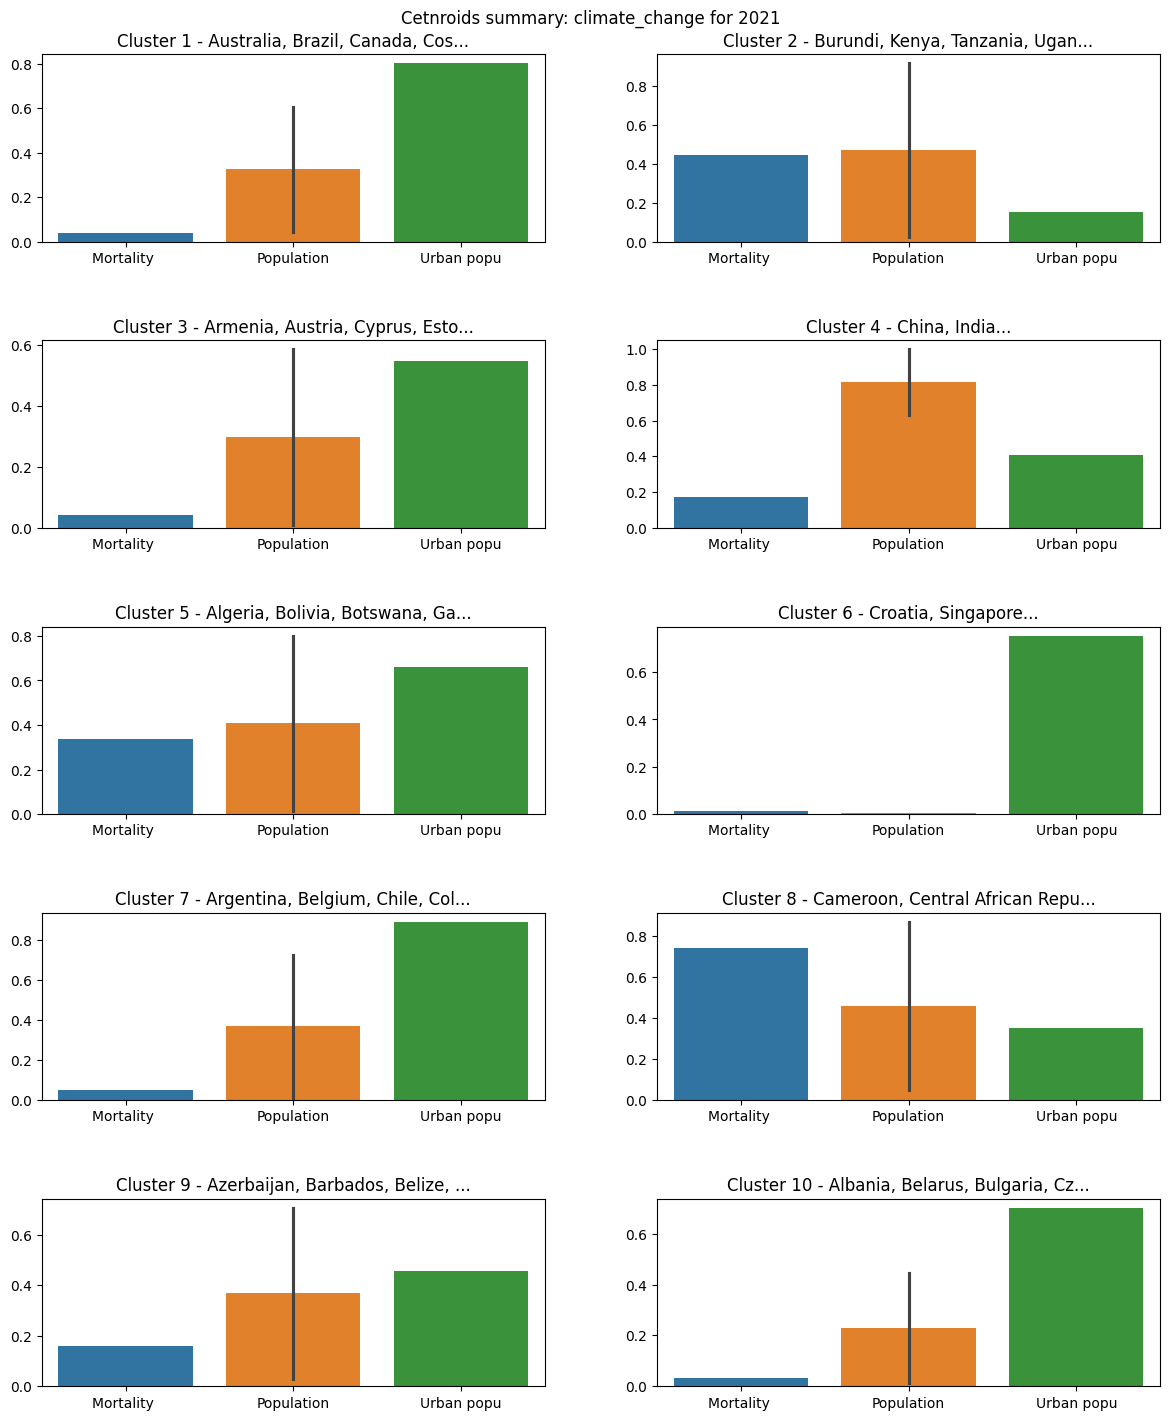

In [24]:
from utlis.visualisation import plot_centroid

plot_centroid(cluster_centers, k_means_outcome, plot_last_year_title)

/tf/World_Bank_Data_Analysis/reports/../utlis/map_handler.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


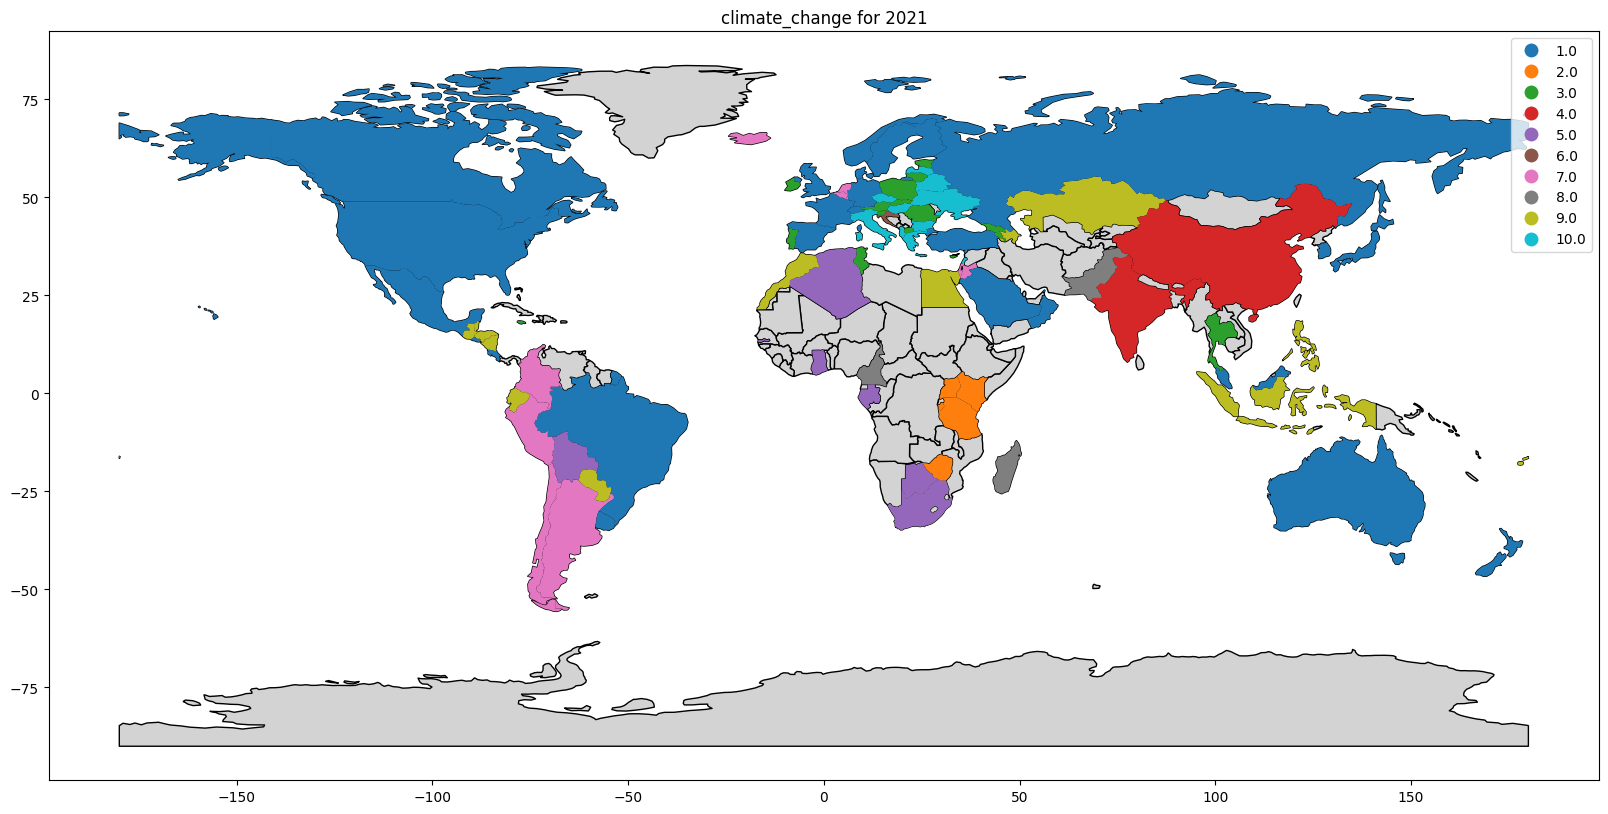

In [25]:
from utlis.map_handler import plot_map

plot_map(k_means_outcome['Cluster'], plot_last_year_title)

## Dynamic Time Warping

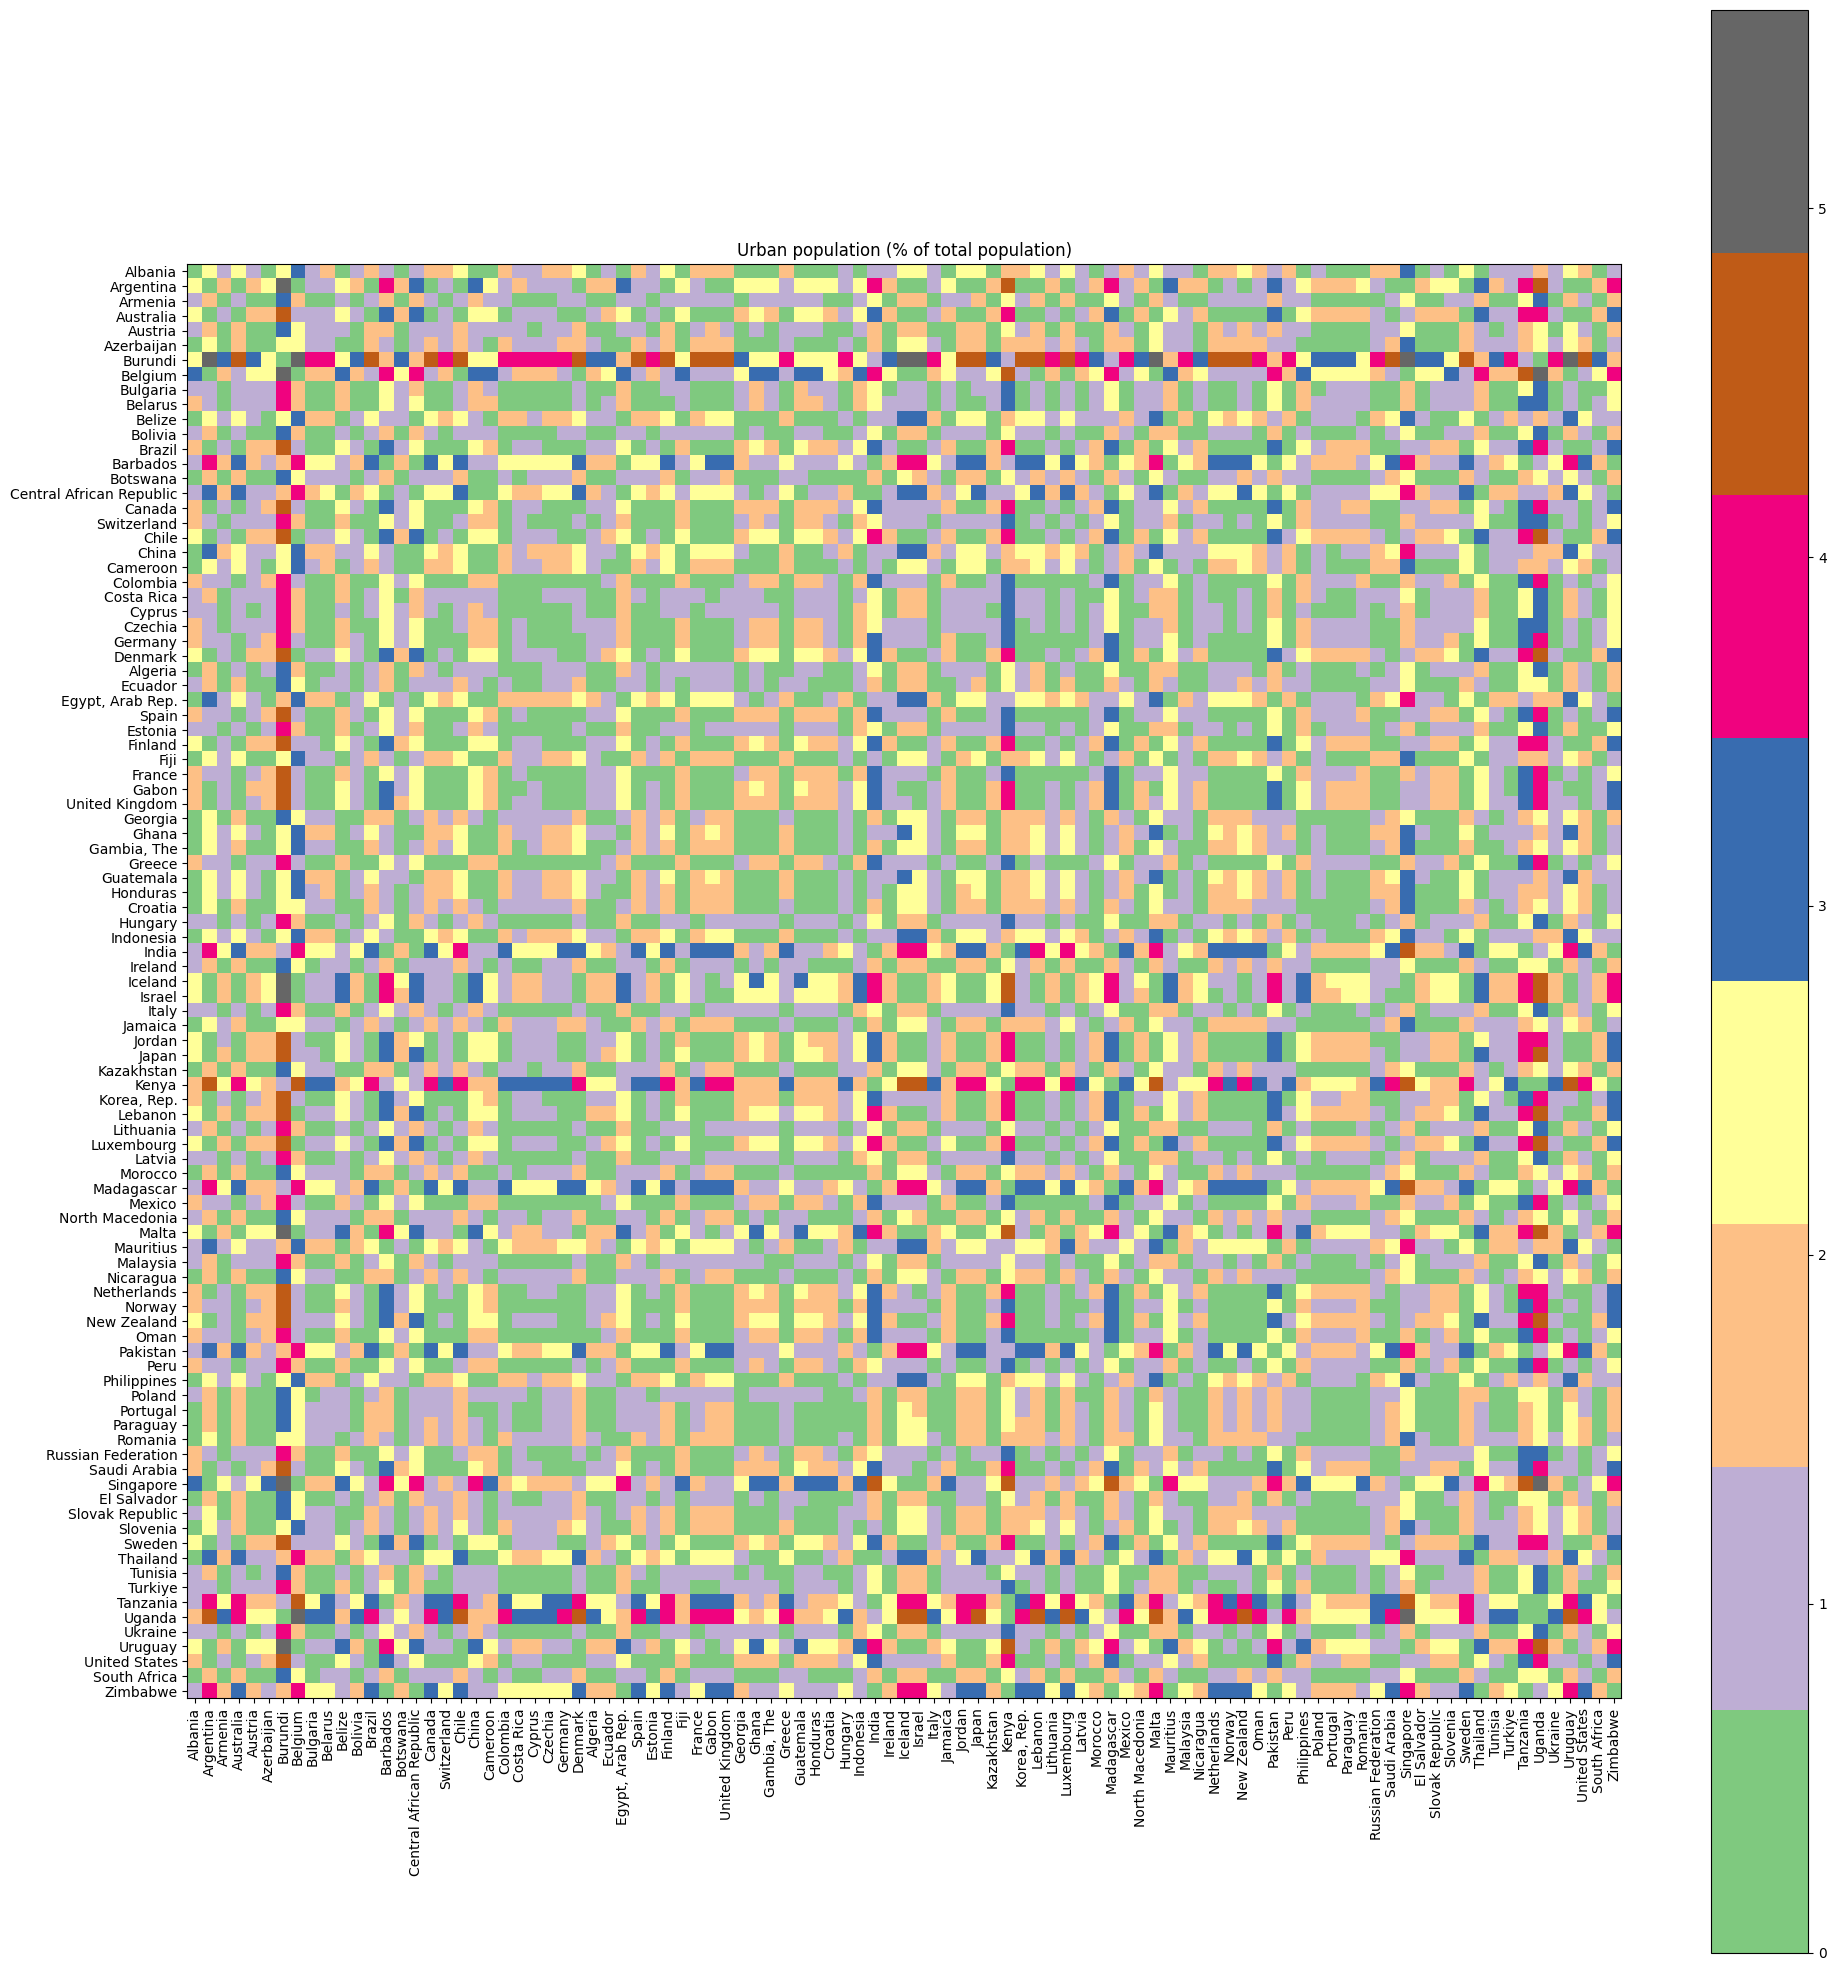

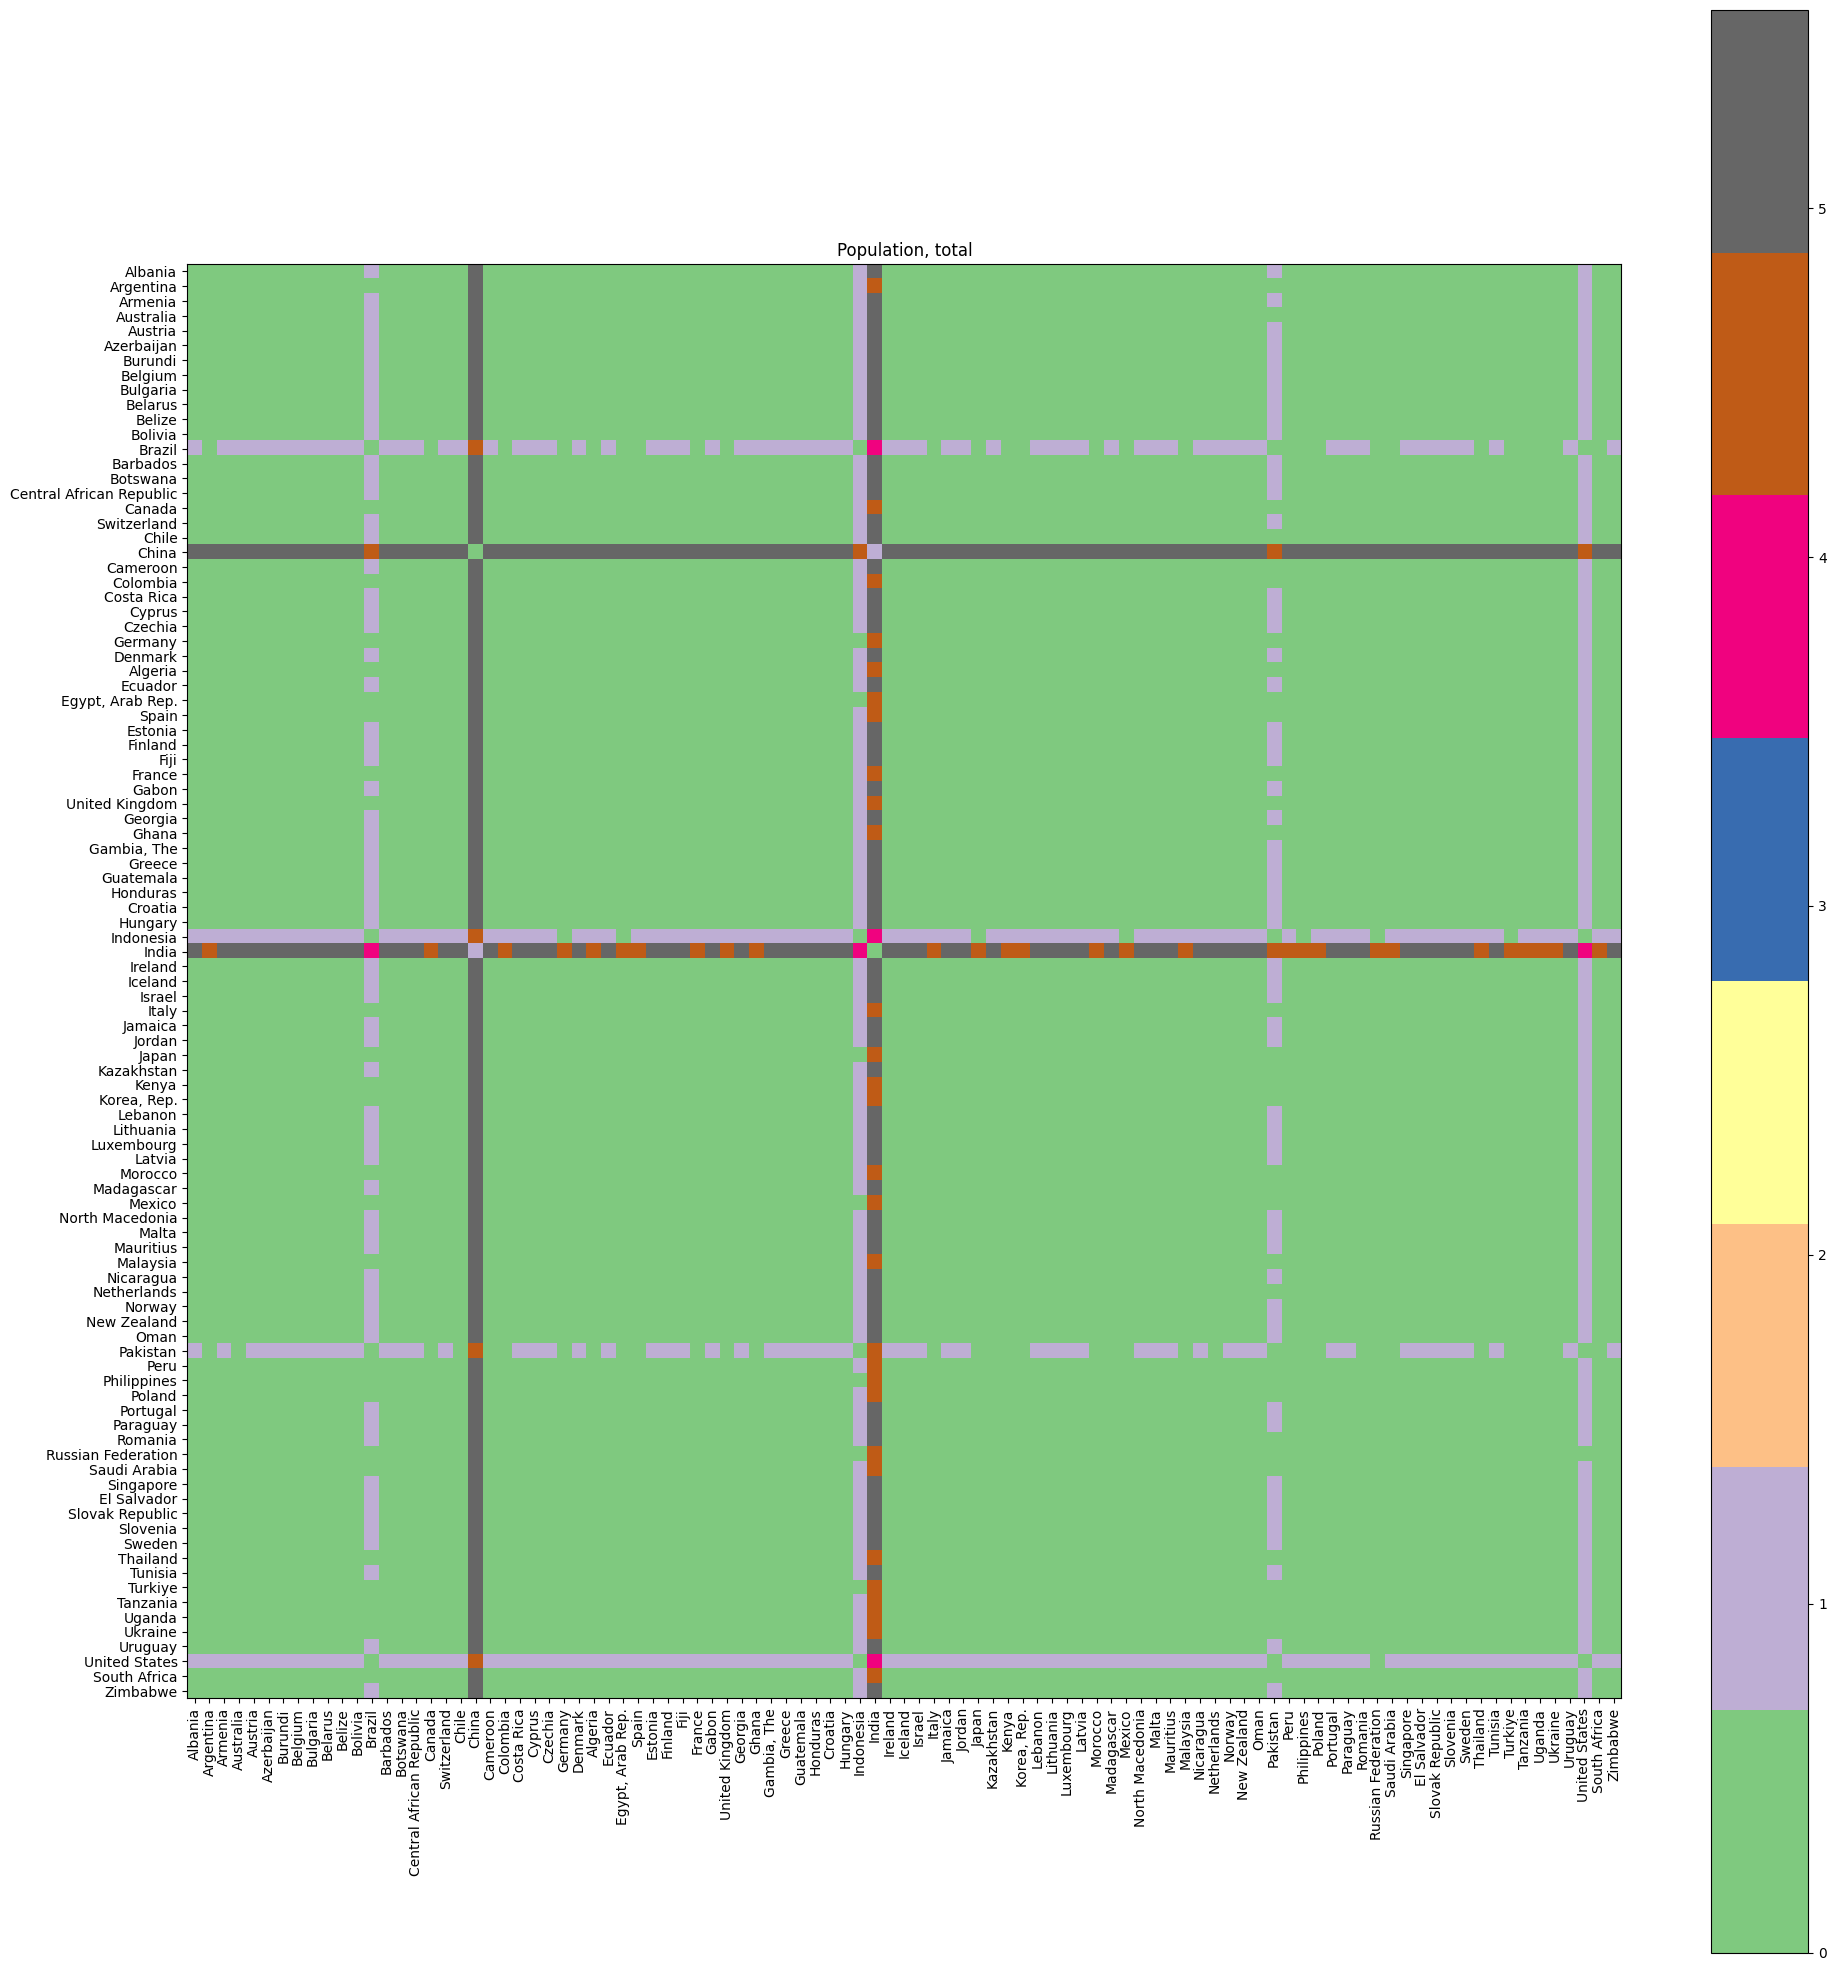

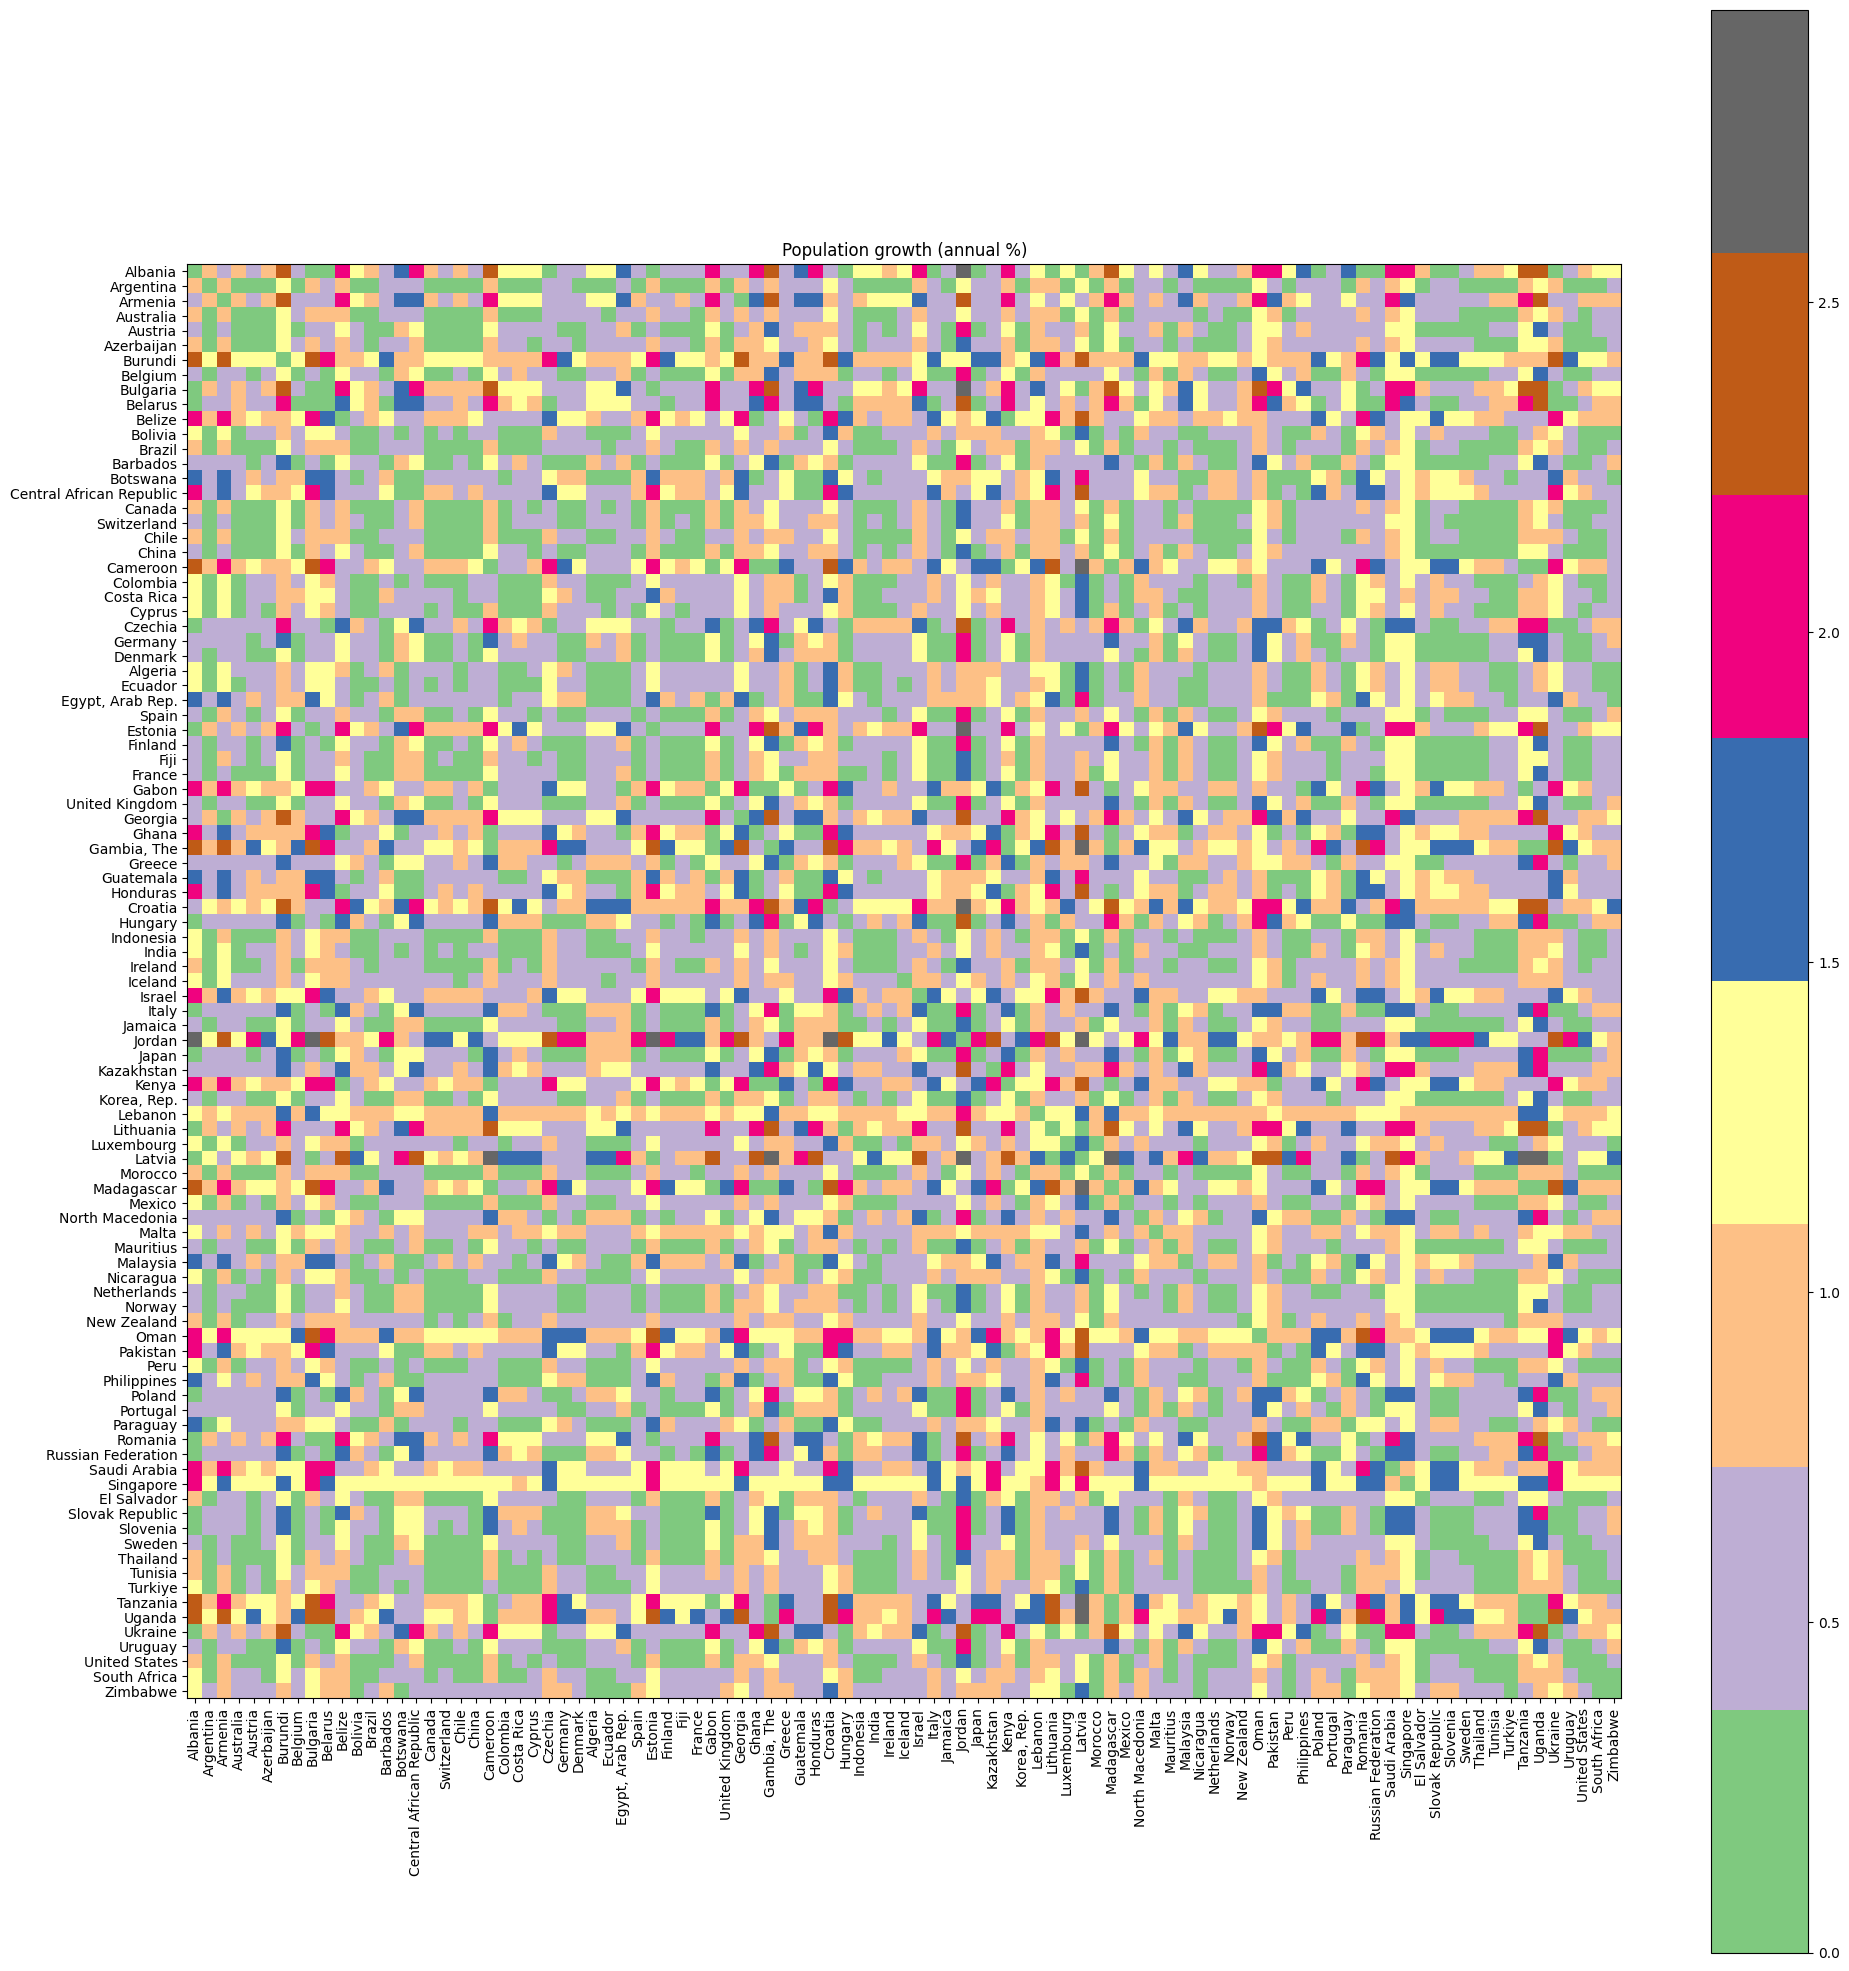

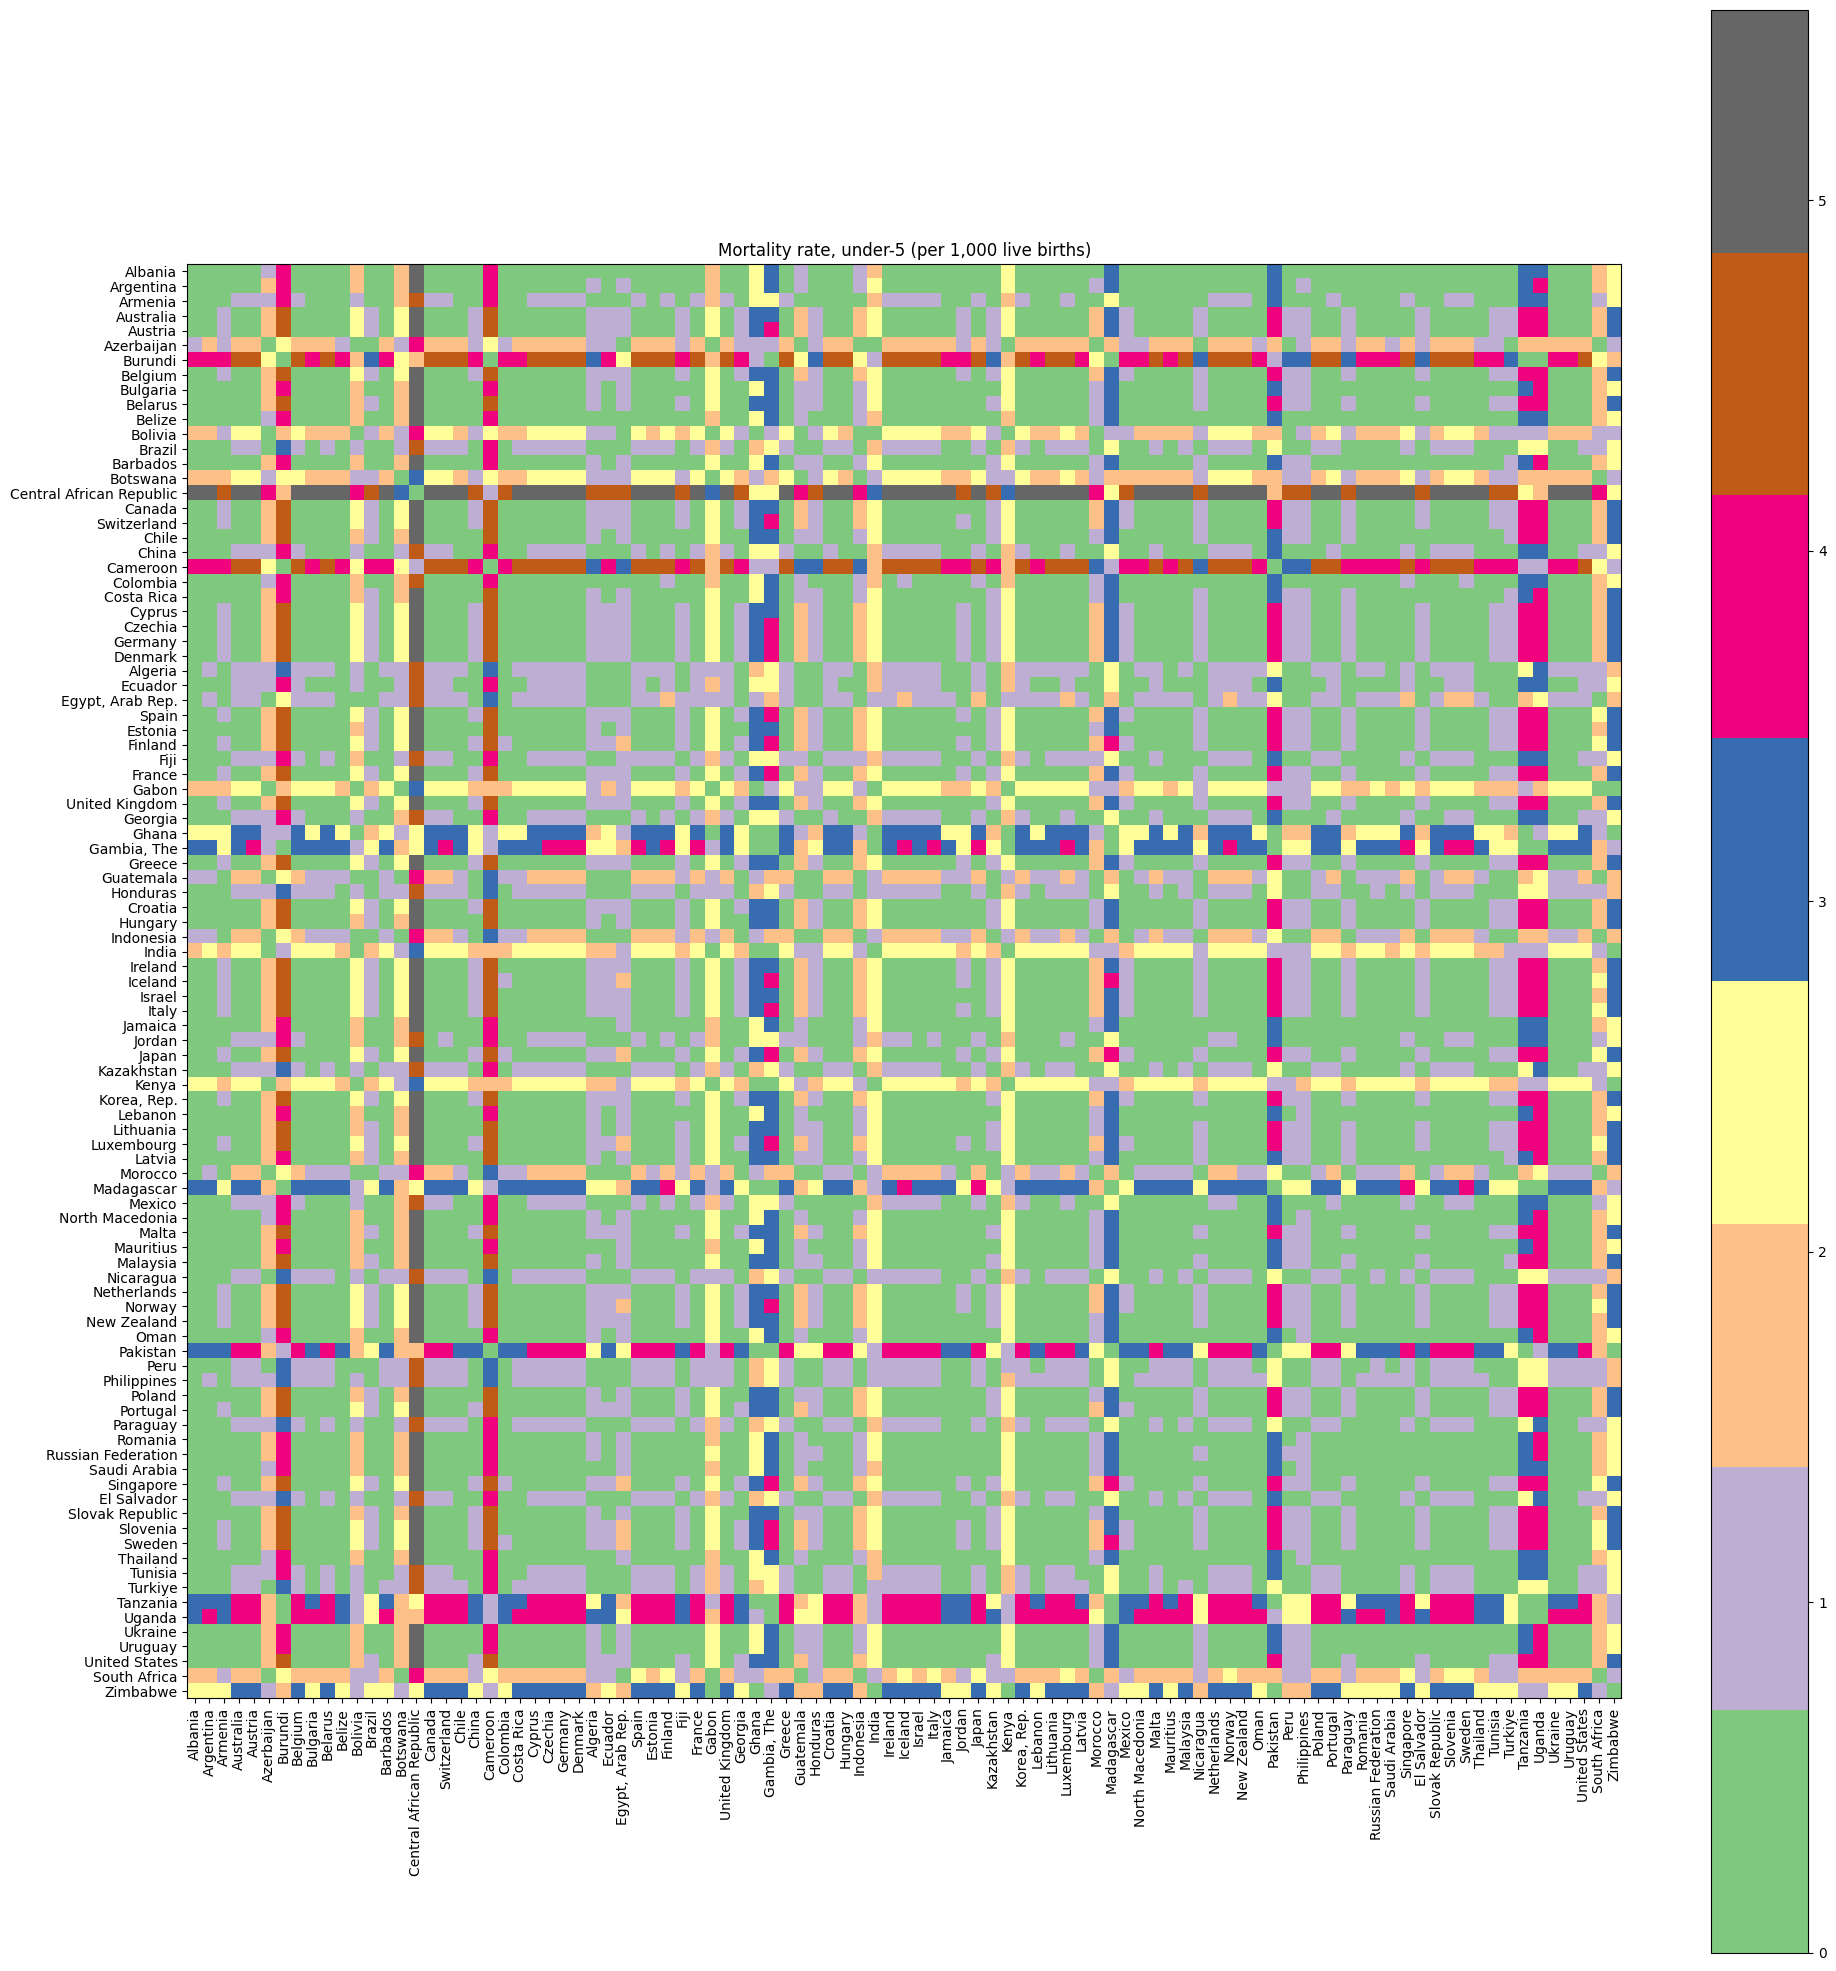

In [26]:
from utlis.dtw import get_indicator_dtw_matrix, plot_time_series_compare_matrix

for indicator in df['Indicator Name'].unique():
    indicator_compare_dataframe = get_indicator_dtw_matrix(df[df['Indicator Name'] == indicator])
    plot_time_series_compare_matrix(indicator_compare_dataframe, indicator_compare_dataframe.columns, indicator, 20)